In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import scan_plot_and_analysis as spa
%matplotlib



Using matplotlib backend: <object object at 0x0000020C019A7720>


In [2]:
def plot_int_heatmap(Xs, Ys, channel_ints, size=(8, 8), save=False, save_name='scan.png'):
    """Plot intensity heatmap of 2D scan."""
    
    Z = channel_ints

    axis_label_size = 26
    axis_tick_size = 22
    cb_label_size = 26
    cb_tick_size = 16
    
    fig, ax = plt.subplots(1, 1, figsize=size)

    plot = ax.pcolor(Xs, Ys, Z, cmap='viridis', shading='auto', norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
    ax.set_aspect('equal')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.10)
    cb = plt.colorbar(plot, cax=cax, orientation='vertical')
    cb.ax.tick_params(labelsize=cb_tick_size)
    cb.set_label(label='Intensity (counts/100ms)', fontsize=cb_label_size)
    
    # ax.autoscale(tight=True)
    ax.set_xlabel('X (µm)', fontsize=axis_label_size)
    ax.set_ylabel('Y (µm)', fontsize=axis_label_size)
    ax.tick_params(axis='both', which='major', labelsize=axis_tick_size)
    # ax.set_title(title, fontsize=26, pad=20)
    plt.tight_layout()

    if save:
        plt.savefig(save_name, dpi=300)
        plt.close(fig)
    else:
        plt.show()

In [3]:
#read in abscounts
scan_name = r"C:\Users\spmno\OneDrive\Documents\spm\test4\Scan Data\2024-04-18/2024-04-18_pq8_scan_data.txt"

len = 100
res = 2.5

Xs, Ys, Ts, CH1_ints, CH2_ints = spa.load_scan_data(len, len, res, scan_name)
sumed = CH1_ints + CH2_ints

# plt.hist(CH2_ints.flatten(), bins=100)
# plt.show()

spa.plot_int_heatmap(Xs, Ys, sumed, save=False)
# spa.plot_int_heatmap(Xs, Ys, CH1_ints, save=False, save_name='{}_ch2.png'.format(scan_name[:-4]))
# spa.plot_positions_and_error(Xs, Ys, res, xlim = (50, 100), ylim = (50, 100), ticks = 4)

In [4]:
lenx = int(1.5 / res) + 1
leny = int(1.5 / res) + 1

scan_data_file = r'C:\Users\spmno\OneDrive\Documents\spm\test4\Scan Data\2024-01-15\2024-01-15_ITK 750pM9_scan_data.txt'

with open(scan_data_file, 'r') as f:
    ch1_abs = []
    ch2_abs = []
    for line in f:
        ch1_abs.append(float(line.strip('[ ] \n').split(',')[0]))
        ch2_abs.append(float(line.strip('[ ] \n').split(',')[1]))
Ch1_ints_gc = np.reshape(ch1_abs, (lenx, leny))
Ch2_ints_gc = np.reshape(ch2_abs, (lenx, leny))



ValueError: cannot reshape array of size 10201 into shape (1,1)

: 

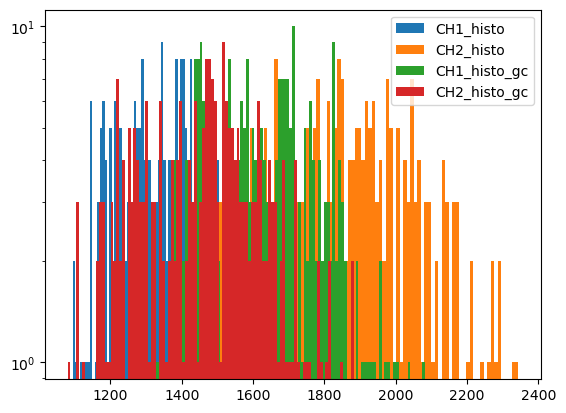

In [ ]:
plt.hist(CH1_ints.flatten(), bins=100, log=True, label='CH1_histo')
plt.hist(CH2_ints.flatten(), bins=100, log=True, label='CH2_histo')
plt.hist(Ch1_ints_gc.flatten()/25, bins=100, log=True, label='CH1_histo_gc')
plt.hist(Ch2_ints_gc.flatten()/25, bins=100, log=True, label='CH2_histo_gc')
plt.legend()
plt.show()


In [ ]:
spa.plot_int_heatmap(Xs, Ys, CH1_ints + CH2_ints, size=(8, 8), save=False, save_name='scan.png')